In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [18]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [19]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23bf8bc04f0>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

#engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 10').fetchall()


('2017-08-23',)


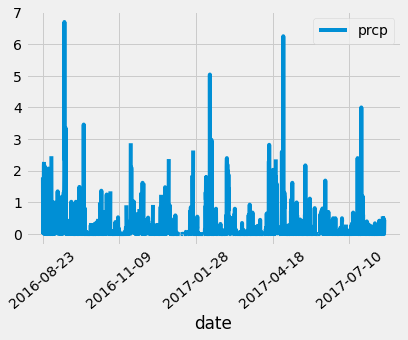

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by((Measurement.date).desc()).first()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
output=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).all()
#output

# Save the query results as a Pandas DataFrame and set the index to the date column
query_result=pd.DataFrame(output)

# Sort the dataframe by date
query_result.set_index('date',inplace=True)
query_result=query_result.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
query_result.plot(rot=40)
plt.show()



In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_result.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_ordered = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_ordered

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = stations_ordered[0][0]
min_temp = session.query(func.min(Measurement.tobs)).filter_by(station=most_active).all()
max_temp = session.query(func.max(Measurement.tobs)).filter_by(station=most_active).all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter_by(station=most_active).all()
print(f'The lowest temp was {min_temp[0][0]}.')
print(f'The highest temp was {max_temp[0][0]}.')
print(f'The average temp was {avg_temp[0][0]:.2f}.')

The lowest temp was 54.0.
The highest temp was 85.0.
The average temp was 71.66.


In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram_data = session.query(Measurement.tobs).filter(Measurement.station==most_active, Measurement.date >= oldest_date)
histogram_data_df = pd.DataFrame(histogram_data)
plt.figure(figsize=(20,10))
plt.hist(histogram_data_df, bins=12, label="tobs")
plt.xlabel("Temperature", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.legend(loc="upper left", fontsize=24)
plt.plot()
plt.savefig("tobs.png")

NameError: name 'oldest_date' is not defined

# Close session

In [33]:
# Close Session
session.close()